## 3.3 STATISTICAL GRAPHICS USING MATPLOTLIB

The tips data we will be using for the next series of visualizations come from the seaborn library. This data set contains the amount of the tips that people leave for various variables. For example, the total cost of the bill, the size of the party, the day of the week, and the time of.

We can load this data set just as we did the Anscombe data set.

Chak's Note: In order to load "tips" dataset, I had to turn off VPN. But work fine after turning VPN back on sns.load_dataset()

In [2]:
# the anscombe data set can be found in the seaborn library
import seaborn as sns

In [5]:
tips = sns.load_dataset("tips")

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
print(tips.tail())

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


### 3.3.1 Univariate

In statistics jargon, the term “univariate” refers to a single variable.

#### 3.3.1.1 Histograms

Histograms are the most common means of looking at a single variable. The values are “binned,” meaning they are grouped together and plotted to show the distribution of the variable (Figure 3.8).

In [8]:
import matplotlib.pyplot as plt

C:\Users\ctongsak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


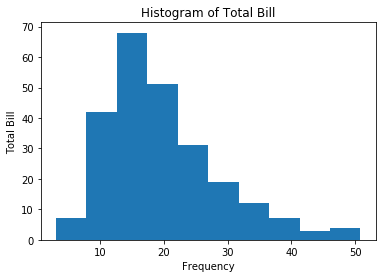

In [9]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')
fig.show()

### 3.3.2 Bivariate

In statistics jargon, the term “bivariate” refers to a two variables.

#### 3.3.2.1 Scatterplot

Scatterplots are used when a continuous variable is plotted against another continuous variable (Figure 3.9).

C:\Users\ctongsak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


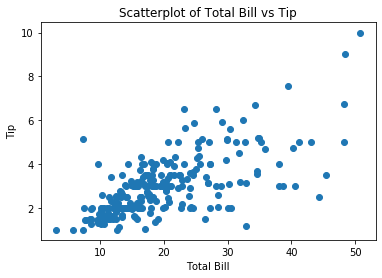

In [10]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

#### 3.3.2.2 Boxplot

Boxplots are used when a discrete variable is plotted against a continuous variable (Figure 3.10).

C:\Users\ctongsak\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


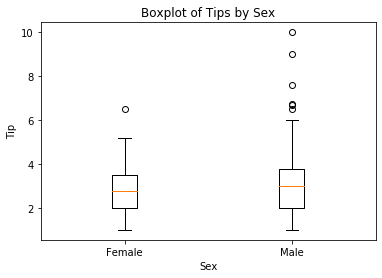

In [11]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot(
    # first argument of boxplot is the data
    # since we are plotting multiple pieces of data
    # we have to put each piece of data into a list
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']],
    # we can then pass in an optional labels parameter
    # to label the data we passed
    labels=['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')
boxplot.show()

### 3.3.3 Multivariate Data

Plotting multivariate data is tricky, because there isn’t a panacea or template that can be used for every case. To illustrate the process of plotting multivariate data, let’s build on our earlier scatterplot. If we wanted to add another variable, say sex, one option would be to color the points based on the value of the third variable.

If we wanted to add a fourth variable, we could add size to the dots. The only caveat with using size as a variable is that humans are not very good at differentiating areas. Sure, if there’s an enormous dot next to a tiny one, your point will be conveyed, but smaller differences are difficult to distinguish, and may add clutter to your visualization. One way to reduce clutter is to add some value of transparency to the individual points, such that many overlapping points will show a darker region of a plot than less crowded areas.

The general rule of thumb is that different colors are much easier to distinguish than changes in size. If you have to use areas to convey differences in values, be sure that you are actually plotting relative areas. A common pitfall is to map a value to the radius of a circle for plots, but since the formula for a circle is πr2, your areas are actually based on a squared scale. That is not only misleading, but also wrong.

Colors are also difficult to pick. Humans do not perceive hues on a linear scale, so you need to think carefully when picking color palettes. Luckily matplotlib2 and seaborn3 come with their own set of color palettes, and tools like colorbrewer4 can help you pick good color palettes.

2. matplotlib colormaps: http://matplotlib.org/users/colormaps.html

3. seaborn color palettes: http://stanford.edu/~mwaskom/software/seaborn-dev/tutorial/color_palettes.html

4. colorbrewer color palettes http://colorbrewer2.org/

Figure 3.11 uses color to add a third variable, sex, to our scatter plot.

C:\Users\ctongsak\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


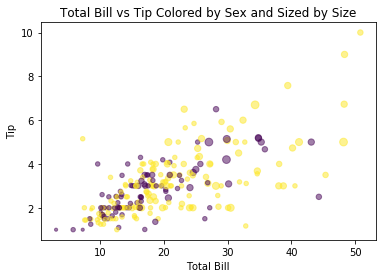

In [12]:
# create a color variable based on sex
def recode_sex(sex):
    if sex == 'Female':
       return 0
    else:
       return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    # set the size of the dots based on party size
    # we multiply the values by 10 to make the points bigger
    # and to emphasize the differences
    s=tips['size'] * 10,
    # set the color for the sex
    c=tips['sex_color'],
    # set the alpha value so points are more transparent
    # this helps with overlapping points
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()